In [1]:
import matplotlib.pyplot as plt
import torch
print(torch.backends.mps.is_available())

False


In [2]:
token =""
with open(".token") as f:
    token = f.read()

In [3]:
from huggingface_hub import login
login(token = token)

c:\Users\notfo\miniconda3\envs\stable-diffusion-xl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to C:\Users\notfo\.cache\huggingface\token
Login successful


In [4]:
# diffusers==0.26.3
from diffusers import DiffusionPipeline 
from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionXLPipeline
from diffusers import StableDiffusionXLAdapterPipeline

# from optimum.quanto import freeze, qfloat8, quantize, qfloat8_e5m2, qfloat8_e4m3fnuz, qint8

# model_id = 'gsdf/Counterfeit-V2.5'
model_id = 'stabilityai/japanese-stable-diffusion-xl'
device = 'cpu'
if torch.backends.mps.is_available():
    device = 'mps'
if torch.cuda.is_available():
    device = 'cuda'
print(device)
# pipe = StableDiffusionXLPipeline.from_pretrained(model_id, trust_remote_code=True).to(device)
# pipe = DiffusionPipeline.from_pretrained(model_id, trust_remote_code=True, low_cpu_mem_usage=False)
# pipe = DiffusionPipeline.from_pretrained(model_id, trust_remote_code=True, low_cpu_mem_usage=False, torch_dtype=torch.float16)
# pipe = StableDiffusionPipeline.from_pretrained(model_id, trust_remote_code=True)
# pipe = StableDiffusionXLPipeline.from_pretrained(model_id, trust_remote_code=True)
# pipe = StableDiffusionXLAdapterPipeline.from_pretrained(model_id, trust_remote_code=True)

# print(pipe)

# quantize(pipe.tokenizer, weights=qfloat8)
# freeze(pipe.tokenizer)
# quantize(pipe.text_encoder, weights=qfloat8)
# freeze(pipe.text_encoder)
# quantize(pipe.text_encoder, weights=qint8)
# freeze(pipe.text_encoder)

# pipe = pipe.to(device)

c:\Users\notfo\miniconda3\envs\stable-diffusion-xl\Lib\site-packages\diffusers\utils\outputs.py:63: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\notfo\miniconda3\envs\stable-diffusion-xl\Lib\site-packages\diffusers\utils\outputs.py:63: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


cuda


c:\Users\notfo\miniconda3\envs\stable-diffusion-xl\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Keyword arguments {'trust_remote_code': True} are not expected by JapaneseStableDiffusionXLPipeline and will be ignored.
100%|██████████| 23/23 [00:21<00:00,  1.09it/s]


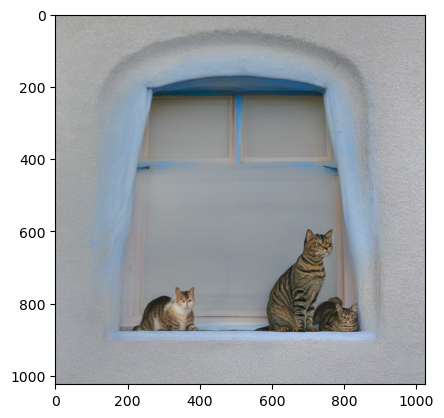

100%|██████████| 23/23 [00:16<00:00,  1.41it/s]


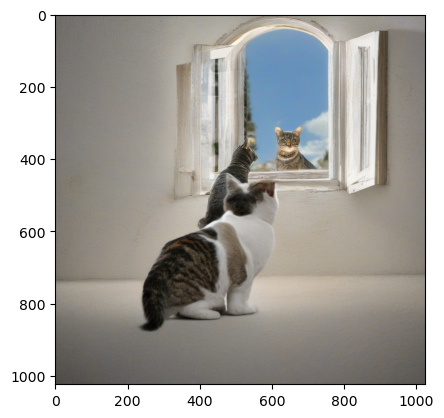

100%|██████████| 23/23 [00:14<00:00,  1.59it/s]


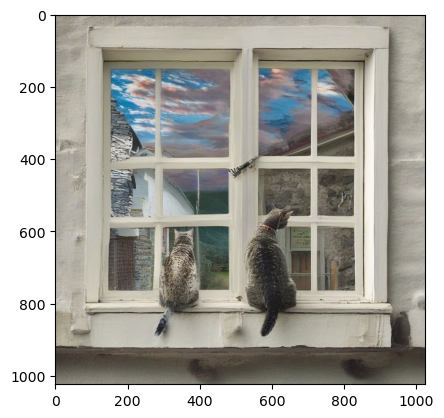

100%|██████████| 23/23 [00:14<00:00,  1.58it/s]


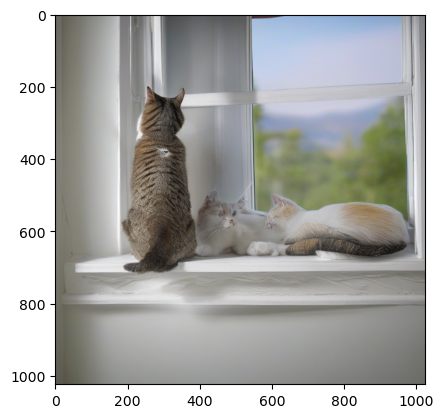

In [5]:
prompt = '窓際でキジ猫と真っ白な猫が2匹横に並んで外を見ている,写真'
# 512 47s
# 640 1:20
# 768 2:7 結構綺麗
# 896 3:00 綺麗
# 1024 3:52

pipe = DiffusionPipeline.from_pretrained(model_id, trust_remote_code=True, low_cpu_mem_usage=False, torch_dtype=torch.float16)
pipe = pipe.to(device)

for i in range(4):
    if device == 'mps':
        torch.mps.empty_cache()
    if device == 'cuda':
        torch.cuda.empty_cache()
    # pipe = DiffusionPipeline.from_pretrained(model_id, trust_remote_code=True, low_cpu_mem_usage=False)
    # pipe = DiffusionPipeline.from_pretrained(model_id, trust_remote_code=True, torch_dtype=torch.float16, device_map="auto")
    img = pipe(prompt=prompt, width=1024, height=1024, num_inference_steps=23).images[0]
    # img.show()
    plt.imshow(img)
    plt.show()